In [1]:
import numpy as np
import pandas as pd

In [2]:
movies=pd.read_csv('movies.csv')

In [3]:
rating=pd.read_csv('ratings.csv')

In [4]:
movies

,Id,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
rating

,Id,MovieId,Rating,Timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
df=pd.merge(movies,rating,on='Id')

In [7]:
df

,Id,Title,Genres,MovieId,Rating,Timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,964981247
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,4.0,964982224
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,47,5.0,964983815
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,50,5.0,964982931
...,...,...,...,...,...,...
88867,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi,166534,4.0,1493848402
88868,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi,168248,5.0,1493850091
88869,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi,168250,5.0,1494273047
88870,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi,168252,5.0,1493846352


In [8]:
df['Rating'].mean()

3.492534206499235

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [15]:
d=df.groupby('Title')['Rating'].mean().sort_values(ascending = False)
d

Title
Lamerica (1994)                                         5.000000
Hunted, The (1995)                                      4.869565
Remains of the Day, The (1993)                          4.846154
Leaving Las Vegas (1995)                                4.807692
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)    4.735294
                                                          ...   
Relative Fear (1994)                                    2.339286
Kika (1993)                                             2.245455
Batman Forever (1995)                                   2.217877
Philadelphia (1993)                                     2.145833
Demolition Man (1993)                                   1.275000
Name: Rating, Length: 523, dtype: float64

In [11]:
df.groupby('Title')['Rating'].count().sort_values(ascending = False).head()

Title
Air Up There, The (1994)      2698
Wild Bunch, The (1969)        2478
In the Line of Fire (1993)    2108
Fearless (1993)               1864
Man of the House (1995)       1346
Name: Rating, dtype: int64

In [12]:
ratings = pd.DataFrame(df.groupby('Title')['Rating'].mean())
ratings

,Rating
Title,
8 Seconds (1994),4.092199
Above the Rim (1994),3.841270
Ace Ventura: Pet Detective (1994),3.768116
Ace Ventura: When Nature Calls (1995),2.607397
Addams Family Values (1993),4.059880
...,...
With Honors (1994),4.000000
Wolf (1994),3.508591
"Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)",3.300000


In [14]:
ratings['Num Of Ratings'] = pd.DataFrame(df.groupby('Title')['Rating'].count())
ratings

,Rating,Num Of Ratings
Title,,
8 Seconds (1994),4.092199,141
Above the Rim (1994),3.841270,126
Ace Ventura: Pet Detective (1994),3.768116,69
Ace Ventura: When Nature Calls (1995),2.607397,703
Addams Family Values (1993),4.059880,167
...,...,...
With Honors (1994),4.000000,51
Wolf (1994),3.508591,291
"Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)",3.300000,30


<AxesSubplot:>

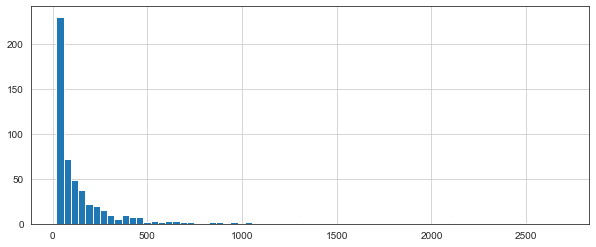

In [16]:
plt.figure(figsize = (10,4))
ratings['Num Of Ratings'].hist(bins = 70)

Text(0, 0.5, '')

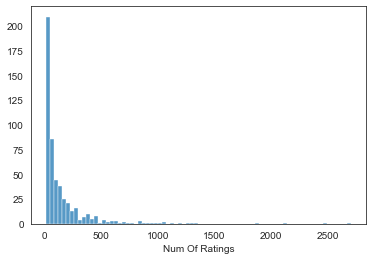

In [17]:
sns.histplot(ratings,x = 'Num Of Ratings')
plt.ylabel('')

<AxesSubplot:>

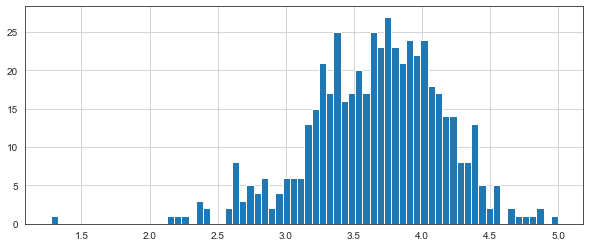

In [18]:
plt.figure(figsize = (10,4))
ratings['Rating'].hist(bins = 70)

In [19]:
moviesmat = df.pivot_table(index='MovieId',columns = 'Title',values = 'Rating')
moviesmat

Title,8 Seconds (1994),Above the Rim (1994),Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),"Addiction, The (1995)","Adventures of Priscilla, Queen of the Desert, The (1994)","Age of Innocence, The (1993)","Air Up There, The (1994)",Airheads (1994),...,White Man's Burden (1995),White Squall (1996),Widows' Peak (1994),Wild Bill (1995),"Wild Bunch, The (1969)",With Honors (1994),Wolf (1994),"Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)",Wyatt Earp (1994),"Young Poisoner's Handbook, The (1995)"
MovieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,4.0,NaN,...,NaN,4.0,NaN,NaN,3.0,NaN,4.5,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,3.0
3,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ratings.sort_values('Num Of Ratings',ascending = False).head(10)

,Rating,Num Of Ratings
Title,,
"Air Up There, The (1994)",3.391957,2698
"Wild Bunch, The (1969)",2.642050,2478
In the Line of Fire (1993),3.398956,2108
Fearless (1993),2.847371,1864
Man of the House (1995),3.235884,1346
Heavy Metal (1981),3.688556,1302
French Twist (Gazon maudit) (1995),3.233730,1260
True Lies (1994),3.673235,1218
Candyman: Farewell to the Flesh (1995),3.657399,1115


In [29]:
air_up_ratings = moviesmat['Air Up There, The (1994)']
wild_bunch_user_ratings = moviesmat['Wild Bunch, The (1969)']
air_up_ratings.head()

MovieId
1    4.0
2    3.0
3    4.0
4    NaN
5    2.0
Name: Air Up There, The (1994), dtype: float64

In [32]:
similar_to_air_up = moviesmat.corrwith(air_up_ratings)
similar_to_wild_bunch_user = moviesmat.corrwith(wild_bunch_user_ratings)

In [33]:
similar_to_air_up

Title
8 Seconds (1994)                                                                                      0.250456
Above the Rim (1994)                                                                                  0.482344
Ace Ventura: Pet Detective (1994)                                                                     0.152469
Ace Ventura: When Nature Calls (1995)                                                                 0.428959
Addams Family Values (1993)                                                                           0.164671
                                                                                                        ...   
With Honors (1994)                                                                                    0.217577
Wolf (1994)                                                                                           0.671439
Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)    0.19

In [24]:
corr_air_up= pd.DataFrame(similar_to_air_up,columns = ['Correlation'])
# corr_air_up.dropna(inplace = True)
corr_air_up.head()

,Correlation
Title,
8 Seconds (1994),0.250456
Above the Rim (1994),0.482344
Ace Ventura: Pet Detective (1994),0.152469
Ace Ventura: When Nature Calls (1995),0.428959
Addams Family Values (1993),0.164671


In [25]:
corr_air_up.sort_values('Correlation',ascending = False).head(10)

,Correlation
Title,
"Air Up There, The (1994)",1.000000
Executive Decision (1996),0.804010
Carlito's Way (1993),0.792559
Braveheart (1995),0.769886
Dunston Checks In (1996),0.751246
Bullets Over Broadway (1994),0.723394
Kicking and Screaming (1995),0.708487
Underneath (1995),0.700620
In the Army Now (1994),0.686935


In [26]:
corr_air_up= corr_air_up.join(ratings['Num Of Ratings'])


In [27]:
corr_air_up.head()

,Correlation,Num Of Ratings
Title,,
8 Seconds (1994),0.250456,141
Above the Rim (1994),0.482344,126
Ace Ventura: Pet Detective (1994),0.152469,69
Ace Ventura: When Nature Calls (1995),0.428959,703
Addams Family Values (1993),0.164671,167


In [ ]:
corr_air_up[corr_air_up['Num Of Ratings']>100].sort_values('Correlation',ascending = False).head(10)[corr_air_up['Num Of Ratings']>100].sort_values('Correlation',ascending = False).head(10)